In [2]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import csv

import requests
from io import StringIO

In [3]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tohah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tohah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Desclaimer
- maaf kalau angka run cell-nya gak urut kak, karena ngerjainnya pararel juga coba-coba di google colab biar cepet gitu kak hehe, contohnya nanti di clean_df ada kolom 'polarity' itu sama dengan kolom 'label_lexicon', gak saya drop soalnya takut tambah ga rapi urutan codingnya dan harus dari awal (laptop ku meronta-ronta kak, mengejar full bintang huhu), tapi dijamin 100% sesuai kak
- dan kalau ada warning2

## Overview Data

In [7]:
flip_reviews_df = pd.read_csv('ulasan_aplikasi_flip1.csv')

In [8]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
flip_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4e0659bd-e970-4a1d-93ee-5e46829c3397,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kurang lebih sudah berapa bulan ini memakai ap...,3,8,3.17.0,2024-08-03 06:37:06,"Halo, Kak Tri Sidowati\n\nMohon maaf atas keti...",2024-08-03 21:04:04,3.17.0
1,cb23c673-6eb9-4bf6-8dee-4696d59c265a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kenapa akhir akhir ini eh udah beberapa bulan,...",1,32,3.16.0,2024-07-24 22:28:31,"Halo, Kak Lia Saroh\n\nMohon maaf atas ketidak...",2024-07-26 15:47:36,3.16.0
2,80b228cb-0c60-4c3b-84de-a6bd2a93a79c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dulu awal pemakaian sekitar 2 tahun lalu Flip ...,2,168,3.13.0,2024-06-07 14:07:09,"Halo, Kak Hendra\n\nMohon maaf atas ketidaknya...",2024-06-15 13:52:56,3.13.0
3,9d5452b3-0167-4993-97de-ec8fb495b1d7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mau transfer dari IDR ke PHP mau pake cara apa...,1,5,3.17.0,2024-08-05 05:18:18,"Halo, Kak MFarid Apreza\n\nMohon maaf atas ket...",2024-08-05 14:27:01,3.17.0
4,4b9d6aee-8b06-44c1-8a9c-a5d953b4f22a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Solusi transfer antar bank tanpa ribet tanpa a...,5,39,3.17.0,2024-08-02 16:56:33,NaN,NaN,3.17.0


In [10]:
flip_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137010 entries, 0 to 137009
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              137010 non-null  object
 1   userName              137010 non-null  object
 2   userImage             137010 non-null  object
 3   content               137010 non-null  object
 4   score                 137010 non-null  int64 
 5   thumbsUpCount         137010 non-null  int64 
 6   reviewCreatedVersion  119963 non-null  object
 7   at                    137010 non-null  object
 8   replyContent          18640 non-null   object
 9   repliedAt             18640 non-null   object
 10  appVersion            119963 non-null  object
dtypes: int64(2), object(9)
memory usage: 11.5+ MB


In [11]:
# hapus nan dan duplikat
clean_df = flip_reviews_df.drop_duplicates()
clean_df = flip_reviews_df.dropna()

In [12]:
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [13]:
clean_df.shape

(14261, 11)

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14261 entries, 0 to 131605
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              14261 non-null  object
 1   userName              14261 non-null  object
 2   userImage             14261 non-null  object
 3   content               14261 non-null  object
 4   score                 14261 non-null  int64 
 5   thumbsUpCount         14261 non-null  int64 
 6   reviewCreatedVersion  14261 non-null  object
 7   at                    14261 non-null  object
 8   replyContent          14261 non-null  object
 9   repliedAt             14261 non-null  object
 10  appVersion            14261 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [15]:
#membuang kolom tak terpakai
'''Desclaimer kolom lain terpakai untuk analisis lain kak, 
tapi kalau untuk sentimen hanya kolom review aja kan hihi'''
clean_df = clean_df.drop(columns=['reviewId','appVersion', 'userName', 'userImage', 'reviewCreatedVersion','at', 'replyContent', 'repliedAt'],axis=1)

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14261 entries, 0 to 131605
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        14261 non-null  object
 1   score          14261 non-null  int64 
 2   thumbsUpCount  14261 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 445.7+ KB


In [17]:
clean_df.sample(10)

,content,score,thumbsUpCount
80213,3 Bintang aja dlu,3,0
65216,Ribet biar tarik saldonya,2,0
6922,"butuh banget tampilan flip seperti dulu😌, seka...",1,0
33477,"Setelah update, akun malah dibekukan. Gak bisa...",2,0
42858,"Tidak dapat isi saldo di flip, sama saja aku h...",1,1
38823,Transfer pakai VA katanya langsung tapi malah ...,1,0
14072,Gara2 tergiur ngisi sopepay 930rb pakai flip. ...,1,0
6987,Kenapa sekarang tidak bisa transfer metode ban...,2,0
15337,Makin ke sini makin menurun pelayanan nya tran...,3,0
18694,Sering terjadi gangguan ketika mau tf... Dan p...,2,0


In [18]:
clean_df["score"].value_counts()

score
1    7378
3    3177
2    2057
5     945
4     704
Name: count, dtype: int64

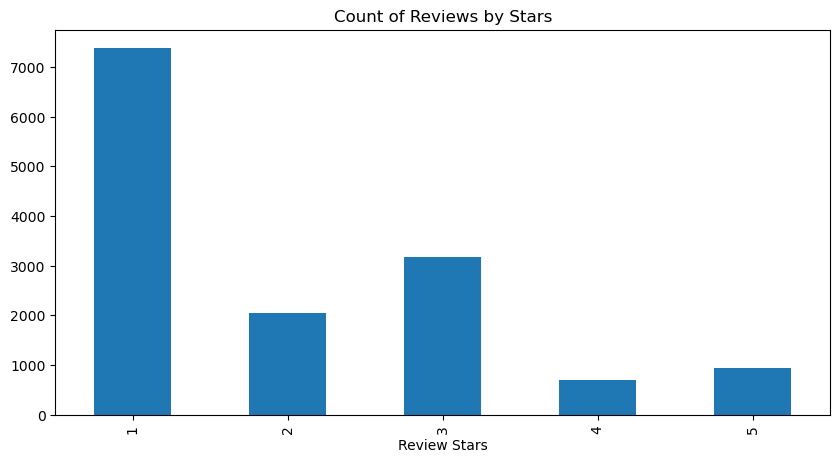

In [19]:
ax = clean_df['score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [20]:
clean_df[clean_df["score"]==3]

,content,score,thumbsUpCount
0,Kurang lebih sudah berapa bulan ini memakai ap...,3,8
15,Kenapa ya flip di saya akhir2 ini sering ngebu...,3,8
23,- Sekarang udah mulai berat di Samsung A52. - ...,3,11
25,"baik, setelah sempat mengalami kendala kesulit...",3,3
26,Nyesel. Setelah di update kok mlh jadi lemot l...,3,4
...,...,...,...
131505,"Bagaimana cara verifikasi nmr telpon, kok gk k...",3,1
131511,Kalo bisa verivikasinay di kembangkan ke Alfa...,3,1
131520,Mudah verifikasi. Kasir alfamart gak ngerti s...,3,1
131527,Verifikasi tatap muka nya ribet. Smoga kedepan...,3,1


## Text Preprocessing

In [40]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemming_sastrawi(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words


def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [42]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", 
              "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", 
              "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", 
              "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", 
              "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", 
              "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", 
              "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", 
              "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", 
              "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", 
              "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", 
              "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", 
              "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", 
              "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", 
              "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", 
              "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", 
              "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", 
              "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", 
              "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", 
              "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [44]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [70]:
clean_df

,content,score,thumbsUpCount
0,Kurang lebih sudah berapa bulan ini memakai ap...,3,8
1,"Kenapa akhir akhir ini eh udah beberapa bulan,...",1,32
2,Dulu awal pemakaian sekitar 2 tahun lalu Flip ...,2,168
3,Mau transfer dari IDR ke PHP mau pake cara apa...,1,5
6,Overall fine fine aja tapi ada satu keluhan da...,4,8
...,...,...,...
131580,Verifikasi yg ribet.......,1,1
131586,Setiap buka kenapa selalu pembaruan? Habis don...,1,0
131590,Masa mau verifikasi harus tatap muka..sedang k...,1,2
131592,Please updatenya jangan keseringan... cukup se...,4,2


In [72]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_stemmed'] = clean_df['text_stopword'].apply(stemming_sastrawi)
clean_df['text_akhir'] = clean_df['text_stemmed'].apply(toSentence)

In [73]:
clean_df.sample(5)

,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemmed,text_akhir
51108,"aplikasi temancok, ngicok'an saldo / pessenah ...",1,0,aplikasi temancok ngicokan saldo pessenah ore...,aplikasi temancok ngicokan saldo pessenah ore...,aplikasi temancok ngicokan saldo pessenah oren...,"[aplikasi, temancok, ngicokan, saldo, pessenah...","[aplikasi, temancok, ngicokan, saldo, pessenah...","[aplikasi, temancok, ngicokan, saldo, pessenah...",aplikasi temancok ngicokan saldo pessenah oren...
226,KTP sudah di foto kan dan akhir nya suruh di i...,3,1,KTP sudah di foto kan dan akhir nya suruh di i...,ktp sudah di foto kan dan akhir nya suruh di i...,ktp sudah di foto kan dan akhir nya suruh di i...,"[ktp, sudah, di, foto, kan, dan, akhir, nya, s...","[ktp, foto, suruh, isi, manual, masuk, tulisan...","[ktp, foto, suruh, isi, manual, masuk, tulis, ...",ktp foto suruh isi manual masuk tulis nomer kt...
19520,"Halo admin, untuk Bank BTN masih belum ada ya?...",3,0,Halo admin untuk Bank BTN masih belum ada ya T...,halo admin untuk bank btn masih belum ada ya t...,halo admin untuk bank btn masih belum ada iya ...,"[halo, admin, untuk, bank, btn, masih, belum, ...","[halo, admin, bank, btn, tolong, saran, min, t...","[halo, admin, bank, btn, tolong, saran, min, t...",halo admin bank btn tolong saran min terimakas...
46114,Pelanggan pertama jadi 3 ⭐🌟⭐ dulu jika hasilny...,3,0,Pelanggan pertama jadi dulu jika hasilnya se...,pelanggan pertama jadi dulu jika hasilnya se...,pelanggan pertama jadi dulu jika hasilnya sesu...,"[pelanggan, pertama, jadi, dulu, jika, hasilny...","[pelanggan, hasilnya, sesuai, iklan, sya, kasi...","[langgan, hasil, sesuai, iklan, sya, kasih, bi...",langgan hasil sesuai iklan sya kasih bintang
99396,Dprank mulu,1,0,Dprank mulu,dprank mulu,dprank melulu,"[dprank, melulu]","[dprank, melulu]","[dprank, melulu]",dprank melulu


In [74]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14261 entries, 0 to 131605
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               14261 non-null  object
 1   score                 14261 non-null  int64 
 2   thumbsUpCount         14261 non-null  int64 
 3   text_clean            14261 non-null  object
 4   text_casefoldingText  14261 non-null  object
 5   text_slangwords       14261 non-null  object
 6   text_tokenizingText   14261 non-null  object
 7   text_stopword         14261 non-null  object
 8   text_stemmed          14261 non-null  object
 9   text_akhir            14261 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.2+ MB


In [84]:
clean_df.sample(5)

,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemmed,text_akhir
75614,Dari e-walet ke bank dong di ada in,1,0,Dari ewalet ke bank dong di ada in,dari ewalet ke bank dong di ada in,dari ewalet ke bank dong di ada in,"[dari, ewalet, ke, bank, dong, di, ada, in]","[ewalet, bank]","[ewalet, bank]",ewalet bank
93728,BURUK SEKALII,1,0,BURUK SEKALII,buruk sekalii,buruk sekalii,"[buruk, sekalii]","[buruk, sekalii]","[buruk, sekali]",buruk sekali
6782,Engga jelas aplikasi nya.. udah ngisi data dir...,1,2,Engga jelas aplikasi nya udah ngisi data diri ...,engga jelas aplikasi nya udah ngisi data diri ...,engga jelas aplikasi nya sudah mengisi data di...,"[engga, jelas, aplikasi, nya, sudah, mengisi, ...","[engga, aplikasi, mengisi, data, tolak, trus, ...","[engga, aplikasi, isi, data, tolak, trus, isi,...",engga aplikasi isi data tolak trus isi manual ...
52527,konfirmasi email nya gak muncul2 kaka,2,0,konfirmasi email nya gak muncul kaka,konfirmasi email nya gak muncul kaka,konfirmasi email nya gak muncul kakak,"[konfirmasi, email, nya, gak, muncul, kakak]","[konfirmasi, email, muncul, kakak]","[konfirmasi, email, muncul, kakak]",konfirmasi email muncul kakak
24643,Flip refundnya lama.pelayanannya kurang baik.t...,1,0,Flip refundnya lamapelayanannya kurang baiktol...,flip refundnya lamapelayanannya kurang baiktol...,flip refundnya lamapelayanannya kurang baiktol...,"[flip, refundnya, lamapelayanannya, kurang, ba...","[flip, refundnya, lamapelayanannya, baiktolong...","[flip, refundnya, lamapelayanannya, baiktolong...",flip refundnya lamapelayanannya baiktolong bai...


## Labelling-Lexicon Indonesia

In [86]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [818]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        # Mengulangi setiap kata dalam teks
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score == 0):
        polarity = 'neutral'
    elif (score < 0):
        polarity = 'negative'

    return score, polarity

In [110]:
results = clean_df['text_stemmed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score_lexicon'] = results[0]
clean_df['label_lexicon'] = results[1]
print(clean_df['label_lexicon'].value_counts())

label_lexicon
negative    6964
positive    5281
neutral     2016
Name: count, dtype: int64


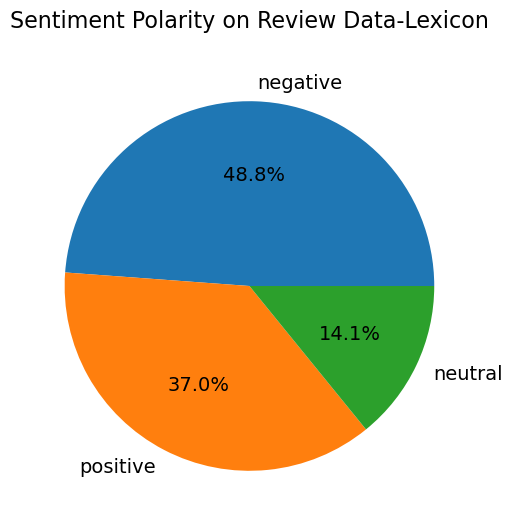

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['label_lexicon'].value_counts()]
labels = list(clean_df['label_lexicon'].value_counts().index)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data-Lexicon', fontsize=16, pad=20)
plt.show()

## Labelling - IndoBERT

In [49]:
import transformers
print(transformers.__version__)

4.44.0


In [52]:
import torch
print(torch.__version__)

2.4.0+cpu


In [820]:
from transformers import pipeline
pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

C:\Users\tohah\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [296]:
def indobert_sentiment_label(text):
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']]
    return status

In [298]:
clean_df['label_indobert'] = clean_df['text_akhir'].apply(indobert_sentiment_label)

In [299]:
clean_df.sample(10)

,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemmed,text_akhir,polarity_score,polarity,label_manual,polarity_score_lexicon,label_lexicon,text_length,label_indobert
61282,Kok Bank Artha Graha Tidak ada ya? Tolong penj...,3,1,Kok Bank Artha Graha Tidak ada ya Tolong penje...,kok bank artha graha tidak ada ya tolong penje...,kok bank artha graha tidak ada iya tolong penj...,"[kok, bank, artha, graha, tidak, ada, iya, tol...","[bank, artha, graha, tolong, penjelasannya]","[bank, artha, graha, tolong, jelas]",bank artha graha tolong jelas,-1,negative,neutral,-1,negative,5,neutral
96707,Mau mrnang,1,0,Mau mrnang,mau mrnang,mau mrnang,"[mau, mrnang]",[mrnang],[mrnang],mrnang,0,neutral,negative,0,neutral,1,negative
49033,cukup membantu tapi masih lambat,3,0,cukup membantu tapi masih lambat,cukup membantu tapi masih lambat,cukup membantu tapi masih lambat,"[cukup, membantu, tapi, masih, lambat]","[membantu, lambat]","[bantu, lambat]",bantu lambat,0,neutral,neutral,0,neutral,2,negative
73852,"Mending pake bnc, dana dll. Ini aplikasi ribet",1,0,Mending pake bnc dana dll Ini aplikasi ribet,mending pake bnc dana dll ini aplikasi ribet,lebih baik pakai bnc dana dan lain-lain ini ap...,"[lebih, baik, pakai, bnc, dana, dan, lain-lain...","[pakai, bnc, dana, lain-lain, aplikasi, ribet]","[pakai, bnc, dana, lain, aplikasi, ribet]",pakai bnc dana lain aplikasi ribet,-8,negative,negative,-8,negative,6,negative
39066,"Proses Verifikasi lama,data diri tidak dipermu...",1,0,Proses Verifikasi lamadata diri tidak dipermud...,proses verifikasi lamadata diri tidak dipermud...,proses verifikasi lamadata diri tidak dipermud...,"[proses, verifikasi, lamadata, diri, tidak, di...","[proses, verifikasi, lamadata, dipermudah, ses...","[proses, verifikasi, lamadata, mudah, sesuai, ...",proses verifikasi lamadata mudah sesuai bank d...,4,positive,negative,4,positive,8,neutral
1696,"Bermanfaat sekali pd masanya, terima kasih! se...",3,0,Bermanfaat sekali pd masanya terima kasih seja...,bermanfaat sekali pd masanya terima kasih seja...,bermanfaat sekali pada masanya terima kasih se...,"[bermanfaat, sekali, pada, masanya, terima, ka...","[bermanfaat, masanya, terima, kasih, hadirnya,...","[manfaat, masa, terima, kasih, hadir, kompetit...",manfaat masa terima kasih hadir kompetitor ovo...,39,positive,neutral,39,positive,43,positive
30178,Kenapa yaa sdh hmpir seminggu ini gk bisa isi ...,1,0,Kenapa yaa sdh hmpir seminggu ini gk bisa isi ...,kenapa yaa sdh hmpir seminggu ini gk bisa isi ...,kenapa yaa sdh hmpir seminggu ini gk bisa isi ...,"[kenapa, yaa, sdh, hmpir, seminggu, ini, gk, b...","[sdh, hmpir, seminggu, gk, isi, pulsa, pdhal, ...","[sdh, hmpir, minggu, gk, isi, pulsa, pdhal, km...",sdh hmpir minggu gk isi pulsa pdhal kmrim bagu...,-10,negative,negative,-10,negative,11,neutral
40848,"Apk ngasih notif berisik, ajak teman dapat 25K...",1,0,Apk ngasih notif berisik ajak teman dapat K ny...,apk ngasih notif berisik ajak teman dapat k ny...,apk memberikan notif berisik ajak teman dapat ...,"[apk, memberikan, notif, berisik, ajak, teman,...","[apk, notif, berisik, ajak, teman, nyata, liha...","[apk, notif, berisik, ajak, teman, nyata, liha...",apk notif berisik ajak teman nyata lihat statu...,11,positive,negative,11,positive,51,negative
6392,flip sering tidak dapat digunakan dikarenakan ...,4,8,flip sering tidak dapat digunakan dikarenakan ...,flip sering tidak dapat digunakan dikarenakan ...,flip sering tidak dapat digunakan dikarenakan ...,"[flip, sering, tidak, dapat, digunakan, dikare...","[flip, internet, internet, bejalan, perangkat,...","[flip, internet, internet, bejalan, perangkat,...",flip internet internet bejalan perangkat mohon...,8,positive,positive,8,positive,10,negative
3580,"maaf ya sy kasih bintang 1 dl,,soalnya sy nga ...",1,0,maaf ya sy kasih bintang dlsoalnya sy nga bis...,maaf ya sy kasih bintang dlsoalnya sy nga bis...,maaf iya saya kasih bintang dlsoalnya saya nga...,"[

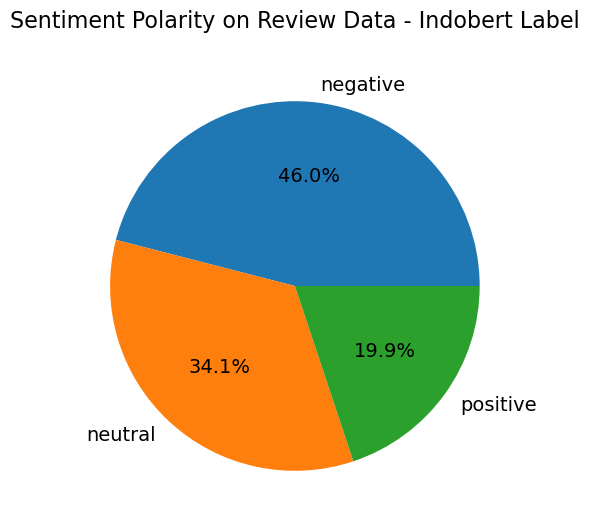

In [302]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['label_indobert'].value_counts()]
labels = list(clean_df['label_indobert'].value_counts().index)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data - Indobert Label', fontsize=16, pad=20)
plt.show()

## Labelling - Manual Labelling by score

In [82]:
clean_df.head()

,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_stemmed,text_akhir
0,Kurang lebih sudah berapa bulan ini memakai ap...,3,8,Kurang lebih sudah berapa bulan ini memakai ap...,kurang lebih sudah berapa bulan ini memakai ap...,kurang lebih sudah berapa bulan ini memakai ap...,"[kurang, lebih, sudah, berapa, bulan, ini, mem...","[memakai, aplikasi, flip, pribadi, aplikasi, b...","[pakai, aplikasi, flip, pribadi, aplikasi, bag...",pakai aplikasi flip pribadi aplikasi bagus mur...
1,"Kenapa akhir akhir ini eh udah beberapa bulan,...",1,32,Kenapa akhir akhir ini eh udah beberapa bulan ...,kenapa akhir akhir ini eh udah beberapa bulan ...,kenapa akhir akhir ini eh sudah beberapa bulan...,"[kenapa, akhir, akhir, ini, eh, sudah, beberap...","[eh, masuk, langsung, tutup, aplikasi, flip, b...","[eh, masuk, langsung, tutup, aplikasi, flip, k...",eh masuk langsung tutup aplikasi flip kali kal...
2,Dulu awal pemakaian sekitar 2 tahun lalu Flip ...,2,168,Dulu awal pemakaian sekitar tahun lalu Flip b...,dulu awal pemakaian sekitar tahun lalu flip b...,dulu awal pemakaian sekitar tahun lalu flip ba...,"[dulu, awal, pemakaian, sekitar, tahun, lalu, ...","[pemakaian, flip, bagus, ramah, fiturnya, muda...","[pakai, flip, bagus, ramah, fiturnya, mudah, p...",pakai flip bagus ramah fiturnya mudah pakai ap...
3,Mau transfer dari IDR ke PHP mau pake cara apa...,1,5,Mau transfer dari IDR ke PHP mau pake cara apa...,mau transfer dari idr ke php mau pake cara apa...,mau transfer dari idr ke php mau pakai cara ap...,"[mau, transfer, dari, idr, ke, php, mau, pakai...","[transfer, idr, php, pakai, apapun, gagal, gk,...","[transfer, idr, php, pakai, apa, gagal, gk, op...",transfer idr php pakai apa gagal gk opsi kirim...
6,Overall fine fine aja tapi ada satu keluhan da...,4,8,Overall fine fine aja tapi ada satu keluhan da...,overall fine fine aja tapi ada satu keluhan da...,overall fine fine saja tapi ada satu keluhan d...,"[overall, fine, fine, saja, tapi, ada, satu, k...","[overall, fine, fine, keluhan, sayakenapa, apk...","[overall, fine, fine, keluh, sayakenapa, apk, ...",overall fine fine keluh sayakenapa apk berat y...


In [94]:
def manual_score_labelling(score):
    if score > 3:
        return 'positive'
    elif score < 3:
        return 'negative'
    else:
        return 'neutral'

In [98]:
clean_df['label_manual'] = clean_df['score'].apply(manual_score_labelling)

In [100]:
print(clean_df['polarity'].value_counts())

polarity
negative    6964
positive    5281
neutral     2016
Name: count, dtype: int64


In [104]:
print(clean_df['label_manual'].value_counts())

label_manual
negative    9435
neutral     3177
positive    1649
Name: count, dtype: int64


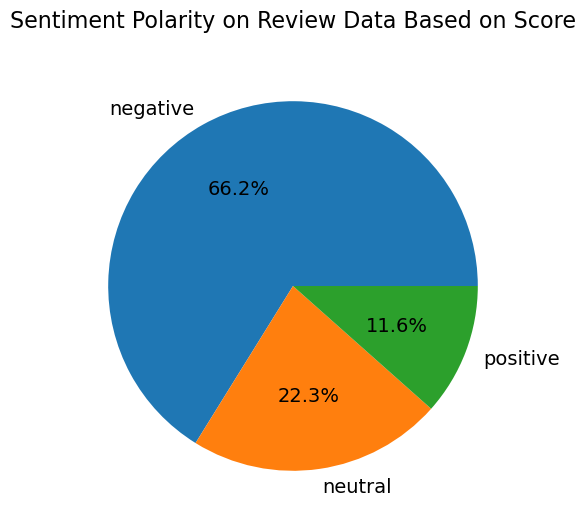

In [106]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['label_manual'].value_counts()]
labels = list(clean_df['label_manual'].value_counts().index)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data Based on Score', fontsize=16, pad=20)
plt.show()

## Wordcloud

In [63]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [65]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

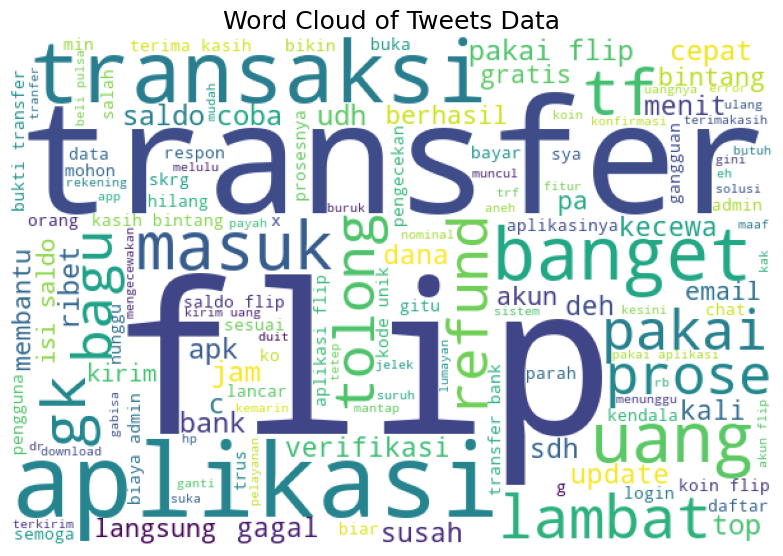

In [96]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

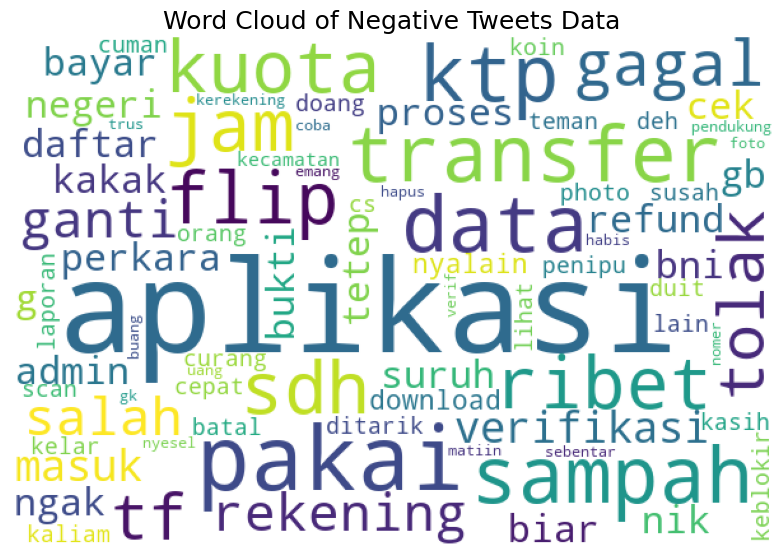

In [97]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

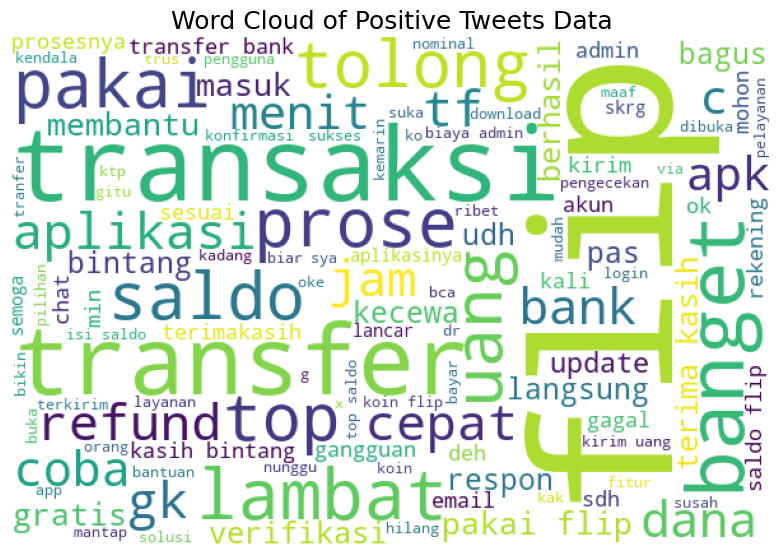

In [98]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

## Feature Extraction

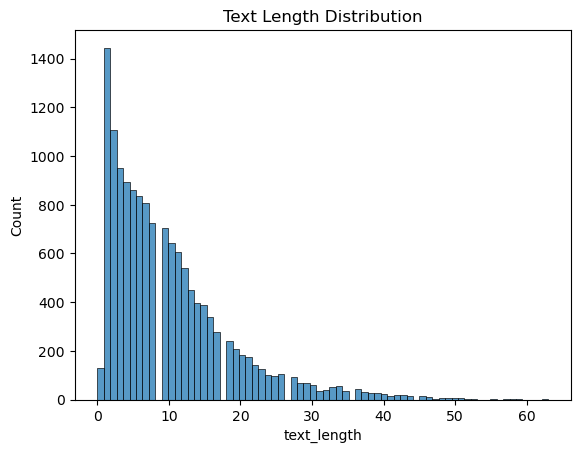

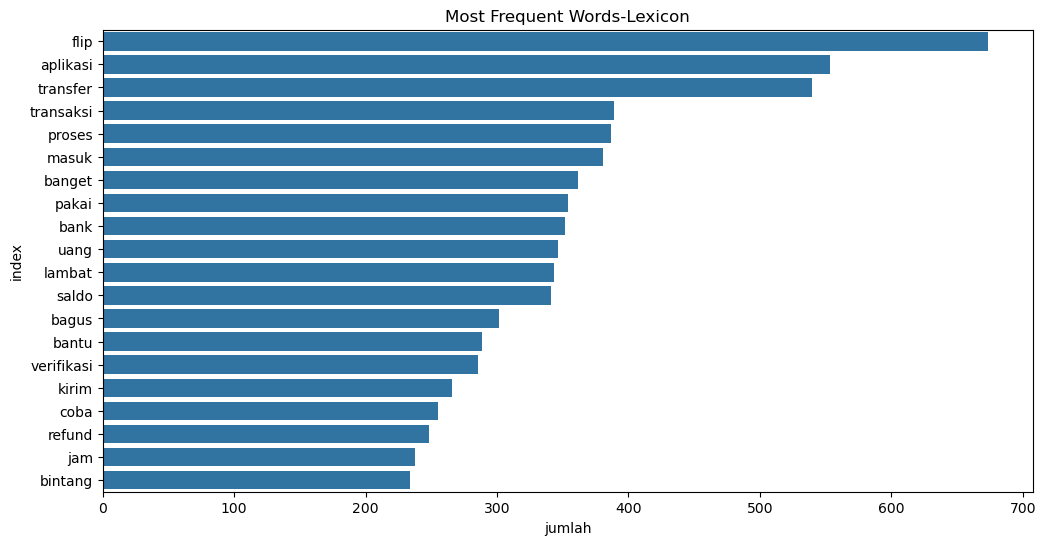

In [118]:
# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting the number of features to 1000
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words-Lexicon')
plt.show()

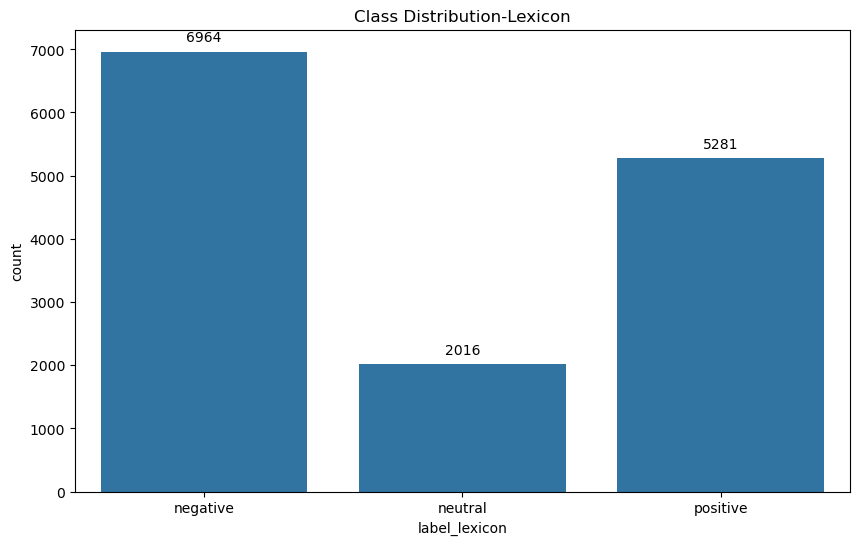

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [120]:
# Set the figure size
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='label_lexicon', data=clean_df)
plt.title('Class Distribution-Lexicon')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

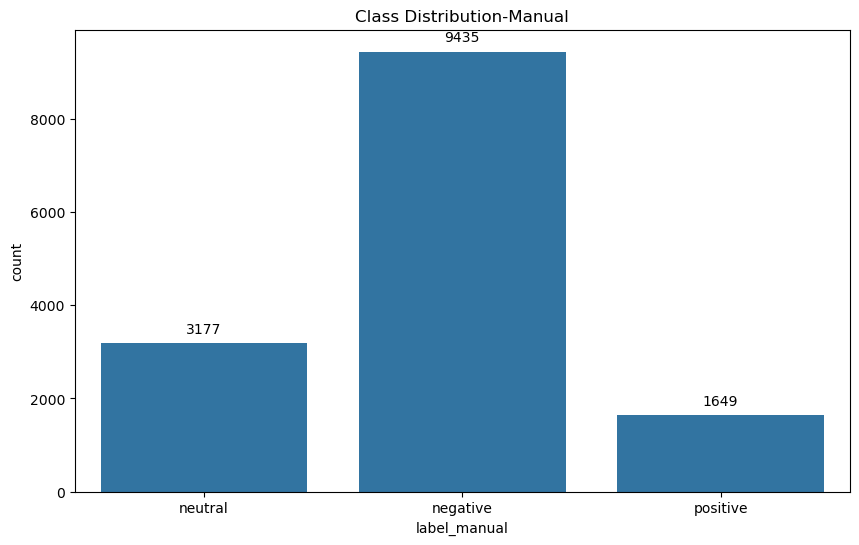

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [697]:
# Set the figure size
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='label_manual', data=clean_df)
plt.title('Class Distribution-Manual')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

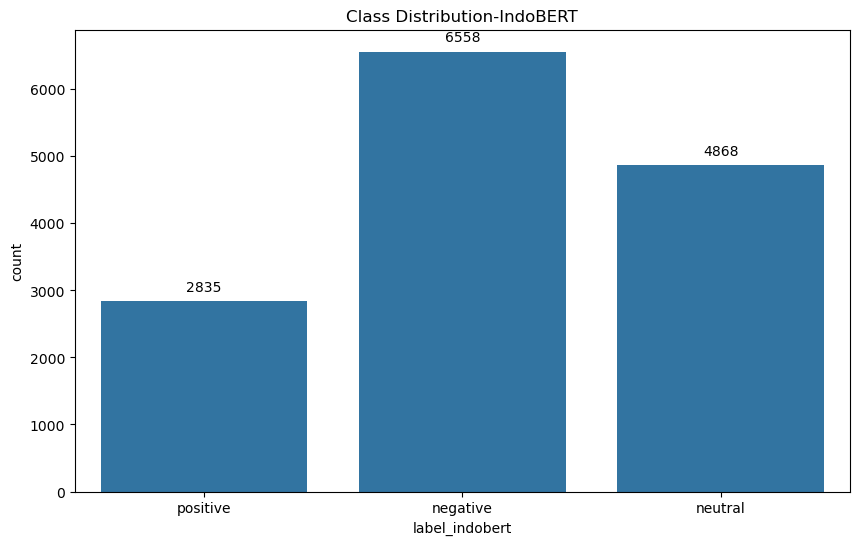

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [699]:
# Set the figure size
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='label_indobert', data=clean_df)
plt.title('Class Distribution-IndoBERT')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

In [306]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y1 = clean_df['label_lexicon']
y2 = clean_df['label_manual']
y3 = clean_df['label_indobert']

Disini saya coba mengulik paramter TF-IDF kak, pakai yg tfidf hasil testnya ga pernah menyentuh 85%, pakai yg vectorizer2, syukur banget sampai lebih kak walau belum dapat 92% 😭, tapii effort kok kak, bisa gak ya full bintang hehe 😅🙏

In [127]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [310]:
vectorizer2 = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_tfidf2 = vectorizer2.fit_transform(X)

In [129]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,admin,ajak,aju,akun,alas,aman,aneh,apk,aplikasi,app,...,udh,ulang,undang,unggah,unik,uninstall,update,upload,verifikasi,via
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.242674,0.0,...,0.0,0.219172,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.400088,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.380372,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.306964,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.761291,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.667555,0.0
14257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
14258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.591009,0.0
14259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [581]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf2.toarray(), columns=vectorizer2.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aaaaaaaaaa,aaaah,aaah,aaan,aah,aahhh,aama,aamiin,aan,aangat,...,zonkketika,zonkkkk,zonnkk,zudh,zulvikar,zuper,zz,zzres,zzz,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Splitting

In [168]:
from sklearn.model_selection import train_test_split

In [501]:
# Lexicon Label
X_train, X_test, y1_train, y1_test = train_test_split(X_tfidf2, y1, test_size=0.2, random_state=42)

In [457]:
#Manual Label
X_train, X_test, y2_train, y2_test = train_test_split(X_tfidf2, y2, test_size=0.2, random_state=42)

In [459]:
#Indobert Label
X_train, X_test, y3_train, y3_test = train_test_split(X_tfidf2, y3, test_size=0.2, random_state=42)

## Handle Imbalance

In [503]:
y1_train.value_counts()

label_lexicon
negative    5559
positive    4217
neutral     1632
Name: count, dtype: int64

In [505]:
y1_test.value_counts()

label_lexicon
negative    1405
positive    1064
neutral      384
Name: count, dtype: int64

In [465]:
y2_train.value_counts()

label_manual
negative    7522
neutral     2528
positive    1358
Name: count, dtype: int64

In [467]:
y2_test.value_counts()

label_manual
negative    1913
neutral      649
positive     291
Name: count, dtype: int64

In [469]:
y3_train.value_counts()

label_indobert
negative    5214
neutral     3882
positive    2312
Name: count, dtype: int64

In [471]:
y3_test.value_counts()

label_indobert
negative    1344
neutral      986
positive     523
Name: count, dtype: int64

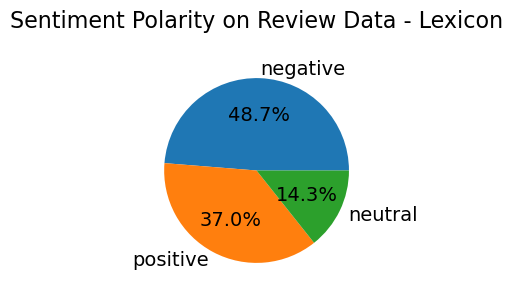

In [473]:
fig, ax = plt.subplots(figsize=(3,3))
sizes = [count for count in y1_train.value_counts()]
labels = list(y1_train.value_counts().index)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data - Lexicon', fontsize=16, pad=20)
plt.show()

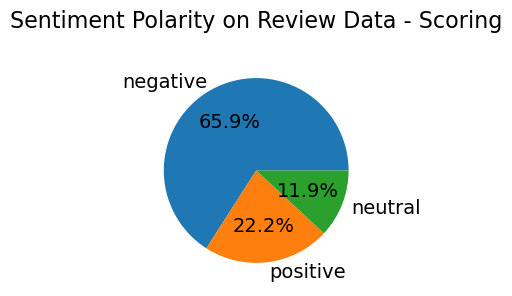

In [475]:
fig, ax = plt.subplots(figsize=(3,3))
sizes = [count for count in y2_train.value_counts()]
labels = list(y1_train.value_counts().index)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data - Scoring', fontsize=16, pad=20)
plt.show()

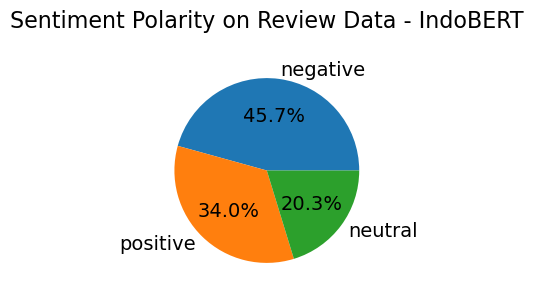

In [477]:
fig, ax = plt.subplots(figsize=(3,3))
sizes = [count for count in y3_train.value_counts()]
labels = list(y1_train.value_counts().index)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data - IndoBERT', fontsize=16, pad=20)
plt.show()

### Handle Imbalance SMOTE + RUS
Disini saya ambil nilai kedua terbanyak sebagai _target_samples_  dari ketiga label kak (Maapin lagi, cell codenya gak saya pisahkan, jadi saya jelasin di komentar ini aja ya hehe), Jadi,
- dari ketiga metode pelabelan; ketiga label memeliki sample 'Negative' yg terbesar, jadi semua sampel negative saya undersampling ke target nilai;
- untuk labelling indobert, peringkat dua terbanyak adalah 'neutral', sehingga label 'positive' yg di SMOTE. Sedangkan lexicon dan manual, label 'positive' adalah peringkat dua terbanyak sehingga 'neutral' yang di SMOTE

In [320]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [826]:
# Define the target number of samples for each class
target_samples = 3882

# Step 1: Undersample the majority class (negative)
rus = RandomUnderSampler(sampling_strategy={"negative": target_samples}, random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y3_train)# diganti y1_train, y2_train, y3_train

# Step 2: Apply SMOTE to the minority class (positive: for indobert, Neutral for lexicon and manual )
smote = SMOTE(sampling_strategy={"positive": target_samples}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_under, y_train_under)

##### Berikut hasil semua handle imbalance kak

In [509]:
#Lexicon
y_train_resampled.value_counts()

label_lexicon
negative    4217
neutral     4217
positive    4217
Name: count, dtype: int64

In [483]:
#Scoring
y_train_resampled.value_counts()

label_manual
negative    2528
neutral     2528
positive    2528
Name: count, dtype: int64

In [824]:
#IndoBert
y_train_resampled.value_counts()

label_indobert
negative    3882
neutral     3882
positive    3882
Name: count, dtype: int64

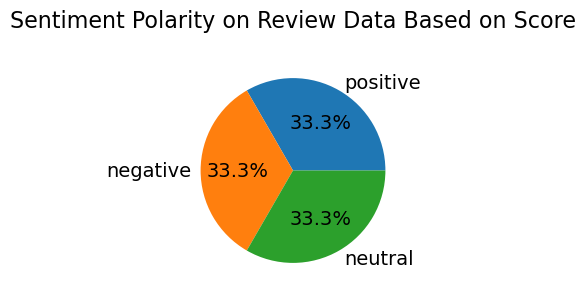

In [243]:
fig, ax = plt.subplots(figsize=(3,3))
sizes = [count for count in y_train_resampled.value_counts()]
labels = list(y_train_resampled.value_counts().index)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data Based on Score', fontsize=16, pad=20)
plt.show()

# Modelling

In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

### 4 Skema berbeda Selected Skenario

In [878]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### Skema 1- Logistic Regression, train:test 80:20

In [897]:
# Lexicon Label
X_train_a, X_test_a, y1_train_a, y1_test_a = train_test_split(X_tfidf2, y1, test_size=0.2, random_state=42)

In [913]:
# Create a logistic regression model
logistic_regression2 = LogisticRegression(penalty='l1', solver='saga')

logistic_regression2.fit(X_train_a.toarray(), y1_train_a)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr1 = logistic_regression2.predict(X_train_a.toarray())
y_pred_test_lr1 = logistic_regression2.predict(X_test_a.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr1 = accuracy_score(y_pred_train_lr1, y1_train_a)
accuracy_test_lr1 = accuracy_score(y_pred_test_lr1, y1_test_a)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr1)
print('Logistic Regression - accuracy_test:', accuracy_test_lr1)

Logistic Regression - accuracy_train: 0.9049789621318373
Logistic Regression - accuracy_test: 0.8853838065194533


#### Skema 1- Logistic Regression, train:test 70:30

In [915]:
# Lexicon Label
X_train_b, X_test_b, y1_train_b, y1_test_b = train_test_split(X_tfidf2, y1, test_size=0.3, random_state=42)

In [916]:
total_samples = len(y1)
train_percentage = len(y1_train_b) / total_samples * 100
test_percentage = len(y1_test_b) / total_samples * 100

print("Training set percentage:", train_percentage)
print("Test set percentage:", test_percentage)

Training set percentage: 69.99509150830937
Test set percentage: 30.004908491690625


In [917]:
logistic_regression2.fit(X_train_b.toarray(), y1_train_b)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr2 = logistic_regression2.predict(X_train_b.toarray())
y_pred_test_lr2 = logistic_regression2.predict(X_test_b.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr2 = accuracy_score(y_pred_train_lr2, y1_train_b)
accuracy_test_lr2 = accuracy_score(y_pred_test_lr2, y1_test_b)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr2)
print('Logistic Regression - accuracy_test:', accuracy_test_lr2)

Logistic Regression - accuracy_train: 0.9030254458024444
Logistic Regression - accuracy_test: 0.8756718859546623


#### Skema 3- SVM, Train:Test 80:20 

In [919]:
# Lexicon Label
X_train_a, X_test_a, y1_train_a, y1_test_a = train_test_split(X_tfidf2, y1, test_size=0.2, random_state=42)

In [920]:
svm_classifier = SVC(kernel='linear', random_state=42)  # You can try different kernels

svm_classifier.fit(X_train_a.toarray(), y1_train_a)

y_pred_train_svm1 = svm_classifier.predict(X_train_a.toarray())
y_pred_test_svm1 = svm_classifier.predict(X_test_a.toarray())

accuracy_train_svm1 = accuracy_score(y_pred_train_svm1, y1_train_a)
accuracy_test_svm1 = accuracy_score(y_pred_test_svm1, y1_test_a)

# Print the accuracy scores
print('SVM - accuracy_train:', accuracy_train_svm1)
print('SVM - accuracy_test:', accuracy_test_svm1)

SVM - accuracy_train: 0.9521388499298737
SVM - accuracy_test: 0.8717139852786541


#### Skema 4- SVM, Train:Test 70:30

In [922]:
# Lexicon Label
X_train_b, X_test_b, y1_train_b, y1_test_b = train_test_split(X_tfidf2, y1, test_size=0.3, random_state=42)

In [923]:
svm_classifier.fit(X_train_b.toarray(), y1_train_b)

y_pred_train_svm2 = svm_classifier.predict(X_train_b.toarray())
y_pred_test_svm2 = svm_classifier.predict(X_test_b.toarray())

accuracy_train_svm2 = accuracy_score(y_pred_train_svm2, y1_train_b)
accuracy_test_svm2 = accuracy_score(y_pred_test_svm2, y1_test_b)

# Print the accuracy scores
print('SVM - accuracy_train:', accuracy_train_svm2)
print('SVM - accuracy_test:', accuracy_test_svm2)

SVM - accuracy_train: 0.9528150671208174
SVM - accuracy_test: 0.8691283010049077


In [932]:
# Membuat DataFrame untuk hasil akurasi
best_results = pd.DataFrame({
    'Model': ['Logistic Regression-80:20', 'Logistic Regression-70:30', 'SVM-80:20', 'SVM-70:30'],
    'Accuracy Train': [accuracy_train_lr1, accuracy_train_lr2, accuracy_train_svm1, accuracy_train_svm2],
    'Accuracy Test': [accuracy_test_lr1, accuracy_test_lr2, accuracy_test_svm1, accuracy_test_svm2]
})
# Menampilkan hanya kolom "Accuracy Test"
best_results

,Model,Accuracy Train,Accuracy Test
0,Logistic Regression-80:20,0.904979,0.885384
1,Logistic Regression-70:30,0.903025,0.875672
2,SVM-80:20,0.952139,0.871714
3,SVM-70:30,0.952815,0.869128


##### Maafin kak belum tembus 92(Too good to be true kak hihi), udah coba berbagai parameter tunning, masih belum sampai, mau coba lagi di vectorizer-nya cuma laptop saya dah meronta-ronta

Sebelumnya saya sudah coba beberapa skema kak, dengan deep learning (LSTM, ann, dan conv1d), dengan labelling pakai indobert, coba handle imbalance, masih belum berhasil dapat akurasi test diatas 85%. nilai akurasi test yg mencapai 85% ialah Skenario dengan data labelling metode lexicon tanpa perlu melakukan handle imbalance data label _y1_train_ dan _y1_test_

Semoga hasil yg terbaik ya kak, kalau saya hitung sih udah masuk 4 bintang hihi(Data sampel >10K, 3 Skema pelatihan, Dataset 3 kelas, sama inference tipis2), 😅🙏. mohon masukan dan sarannya kak

# Testing

In [937]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = vectorizer2.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression2.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif  prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru:  flip sangat memudahkan, membuat proses transaksi jadi lebih cepat


Sentimen kalimat baru adalah POSITIF.


In [939]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = vectorizer2.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression2.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif  prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru:  Verifikasi ribet


Sentimen kalimat baru adalah NEGATIF.


In [941]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = vectorizer2.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression2.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif  prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru:  lumayann


Sentimen kalimat baru adalah NETRAL.


In [943]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = vectorizer2.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression2.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif  prediksi_sentimen[0] == 'negative':
    print("Sentimen kalimat baru adalah NEGATIF.")
else:
    print("Sentimen kalimat baru adalah NETRAL.")

Masukkan kalimat baru:  Biasanya cepat kok sekarang lama ya


Sentimen kalimat baru adalah NETRAL.


# Referensi
- Modul dan Hands-on Dicoding
- https://github.com/angelmetanosaa/dataset
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://huggingface.co/mdhugol/indonesia-bert-sentiment-classification

In [807]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
